# Знакомство с данными

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

Функция, переводящая данный вектор в изображения, размера $n \times n$.

In [2]:
def to_img(vector, demension):
    img = list([])
    j = demension
    while (j <= len(vector)):
        img.append(vector[j - demension + 1: j])
        j += demension
    return img

In [3]:
# Загружите обучающую выборку (признаки и метки классов)
data = list([])
f = open("train.csv")
i = 0
for line in f:
    if i == 0:
        i = 1
        continue
    data.append(list(map(int, line.split(','))))
f.close()
data = np.array(data)
x_train = data[:, 1:]
y_train = data[:, 0]

# Нарисуем каждую цифру по одному разу.

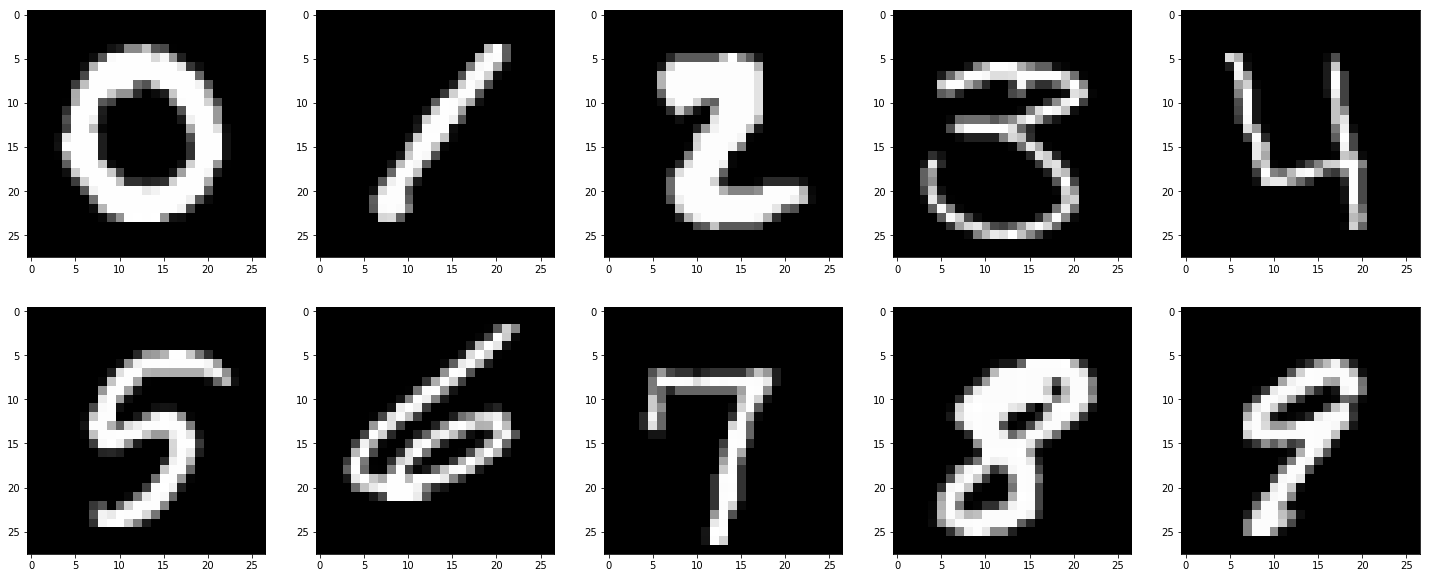

In [4]:
# нарисуйте по одной картинке каждой из 10 цифр (любые)
plt.figure(figsize=(25, 10))
for i in range(10):
    for k in range(len(x_train)):
        if y_train[k] == i:
            plt.subplot(2, 5, i + 1)
            plt.imshow(to_img(x_train[k], 28), cmap='gray')
            break


В качестве признаков мы будем брать каждый пиксель в отдельности. Итого $28\times28 = 784$ признаков. В качестве объектов мы рассмотрим вектор, полученный путем "вытягивания" матрицы, задающей картинку, в длинный вектор. Таких у нас $len(x\_train)$

In [5]:
print(len(x_train))

42000


# Нарисуем среднее изображение.

<class 'numpy.ndarray'>


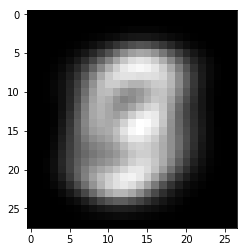

In [14]:
average_img_for_all = sum(x_train) // len(x_train)
plt.imshow(to_img(average_img_for_all, 28), cmap='gray')

# Нарисуем среднее изображение для каждой из цифр.
А так же запомним их в список $average\_images$, где i-й элемент соответствует среднему рисунку для i-й цифры.

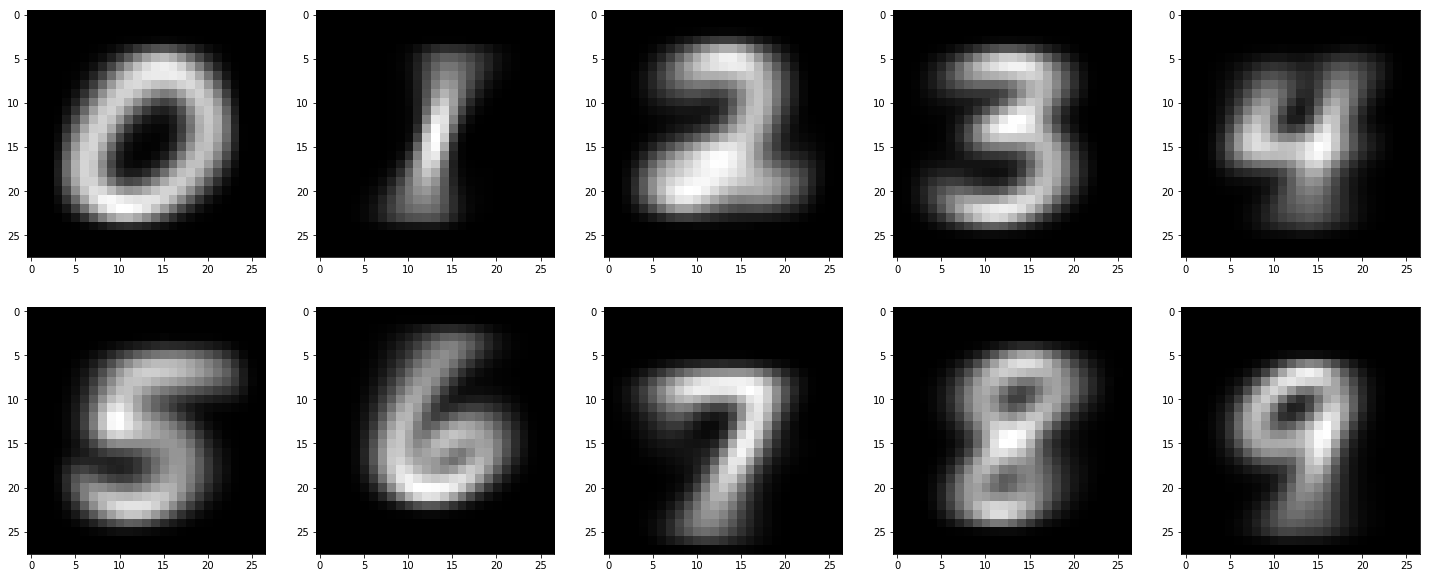

In [7]:
plt.figure(figsize=(25, 10))
average_images = np.zeros((10, len(x_train[0])), dtype=int)
for digit in range(10):
    average_img = np.array([0] * len(x_train[0]))
    k = 0
    for i in range(len(x_train)):
        if y_train[i] == digit:
            average_img += x_train[i]
            k += 1
    average_img //= k # непонятно, почему если убрать эту строчку, то ничего не изменится...
    average_images[digit] = average_img
    plt.subplot(2, 5, digit + 1)
    plt.imshow(to_img(average_img, 28), cmap='gray')

In [ ]:
# нарисуйте 3 самых близких с среднему изображинию и 3 самых далеких от среднего изображений
# Прокомментируйте

# Нарисуем 3 самых близких к среднему изображиний и 3 самых далеких от среднего изображений. 
## В первой строке выведем 3 самых близких, а во второй 3 самых далеких
Вообще что значит близкий к изображению? Изображение -- это матрица, которая в свою очередь представляется длинным вектором. Разность текущего вектора и среднего -- искомое расстояние.

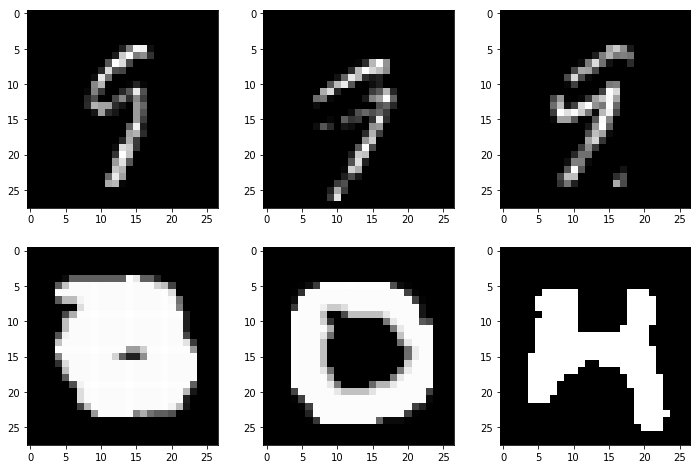

In [15]:
plt.figure(figsize=(12, 8))
min_imgs = list([])
max_imgs = list([])
for i in range(len(x_train)):
    distance = sum((x_train[i] - average_img_for_all)**2)
    if len(min_imgs) < 3:
        min_imgs.append((distance, i))
        min_imgs.sort()
    if len(max_imgs) < 3:
        max_imgs.append((distance, i))
        max_imgs.sort(reverse=True)
    if len(max_imgs) < 3 or len(min_imgs) < 3:
        continue
    if (distance, i) < min_imgs[-1]:
        min_imgs[-1] = (distance, i)
        min_imgs.sort()
    if (distance, i) > max_imgs[-1]:
        max_imgs[-1] = (distance, i)
        max_imgs.sort(reverse=True)
for i in range(len(min_imgs)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(to_img(x_train[min_imgs[i][1]], 28), cmap='gray')
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(to_img(x_train[max_imgs[i][1]], 28), cmap='gray')

Менее яркие и четкие картинки наименее отличаются от среднего изображения, а самые яркие -- наиболее

# А теперь для каждой цифры выведем по 3 самых близких и по 3 самых далеких от своего (!!!) среднего изображения
## i-я строка соответствует i-й цифре. Первые 3 столбца -- самые близкие, последние 3 -- самые далекие.

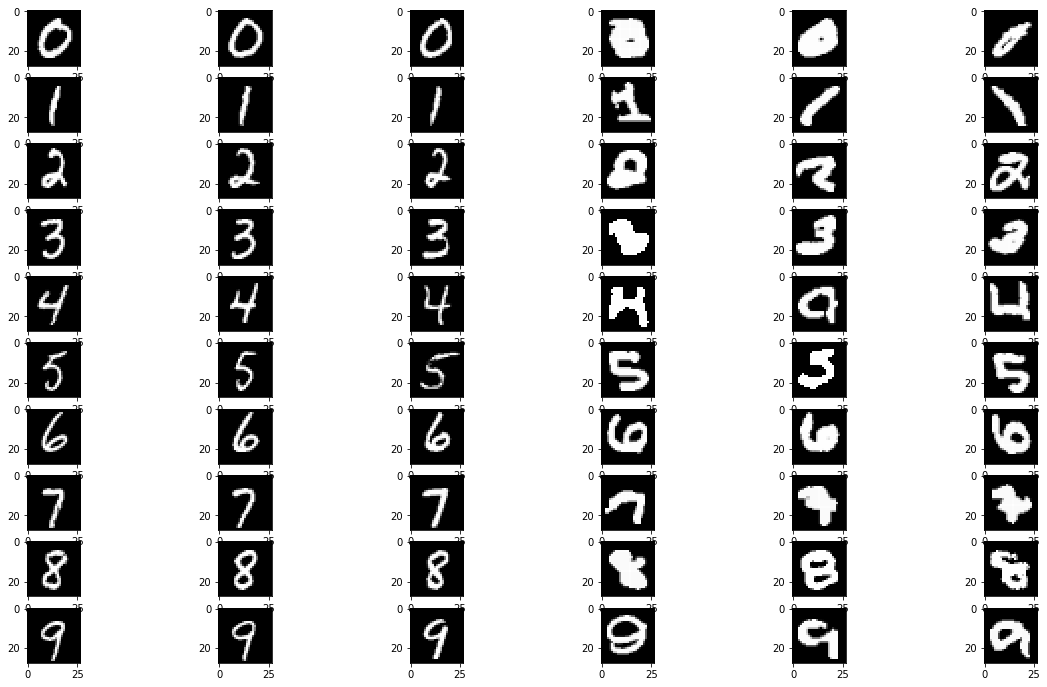

In [16]:
plt.figure(figsize=(10 * 2, 6 * 2))
for digit in range(10):
    min_imgs = list([])
    max_imgs = list([])
    for i in range(len(x_train)):
        if (digit == y_train[i]):
            distance = sum((x_train[i] - average_images[y_train[i]])**2)
            if len(min_imgs) < 3:
                min_imgs.append((distance, i))
                min_imgs.sort()
            if len(max_imgs) < 3:
                max_imgs.append((distance, i))
                max_imgs.sort(reverse=True)
            if len(max_imgs) < 3 or len(min_imgs) < 3:
                continue
            if (distance, i) < min_imgs[-1]:
                min_imgs[-1] = (distance, i)
                min_imgs.sort()
            if (distance, i) > max_imgs[-1]:
                max_imgs[-1] = (distance, i)
                max_imgs.sort(reverse=True)
    for i in range(len(min_imgs)):
        plt.subplot(10, 6, digit * 6 + i + 1)
        plt.imshow(to_img(x_train[min_imgs[i][1]], 28), cmap='gray')
        plt.subplot(10, 6, digit * 6 + i + 1 + 3)
        plt.imshow(to_img(x_train[max_imgs[i][1]], 28), cmap='gray')

Комментарии тут излишне. На картинках и так все видно.

# Разобьем выборку на обучающую и тестовую в отношении 7:3.

Теперь, когда мы выгрузили данные для обучения, хотелось бы назвать их как $x\_data$ и $y\_data$, а выборки для обучения и тестирования $x\_train$ и $y\_train$. В этом нам поможет глубокое копирование.

In [17]:
from sklearn.model_selection import train_test_split
from copy import deepcopy
x_data = deepcopy(x_train)
y_data = deepcopy(y_train)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [18]:
# Какая еще информация о данных кажется Вам важной?